In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "../data/"

In [3]:
train_pos = pd.read_fwf(DATA_FOLDER + "train_pos.txt", header=None, names=["tweets"])
train_neg = pd.read_fwf(DATA_FOLDER + "train_neg.txt", header=None, names=["tweets"])

# Are there any duplicates ?

In [4]:
duplicated_pos = train_pos.duplicated().sum()
train_pos_without_duplicates = train_pos.drop_duplicates()
print("Percentage of duplicated tweets in the positive dataset: ", round((duplicated_pos*100/len(train_pos)),2), "%")

Percentage of duplicated tweets in the positive dataset:  9.77 %


In [5]:
duplicate_neg = train_neg.duplicated().sum()
train_neg_without_duplicates = train_neg.drop_duplicates()
print("Percentage of duplicated tweets in the negative dataset: ", round((duplicate_neg*100/len(train_neg)),2), "%")

Percentage of duplicated tweets in the negative dataset:  8.91 %


# Most common Words 

In [6]:
#Put each positive tweet in lower case
train_pos_without_duplicates.tweets.apply(lambda x : x.lower())
train_neg_without_duplicates.tweets.apply(lambda x : x.lower())
#Add the correct label for each dataset (1 for positive, 0 for negative)
train_pos_without_duplicates.loc[train_pos_without_duplicates.index, 'labels'] = 1
train_neg_without_duplicates.loc[train_neg_without_duplicates.index, 'labels'] = 0

/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/2020573992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pos_without_duplicates.loc[train_pos_without_duplicates.index, 'labels'] = 1
/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/2020573992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_neg_without_duplicates.loc[train_neg_without_duplicates.index, 'labels'] = 0


In [7]:
train_pos_without_duplicates.head()

,tweets,labels
0,<user> i dunno justin read my mention or not ....,1.0
1,"because your logic is so dumb , i won't even c...",1.0
2,""" <user> just put casper in a box ! "" looved t...",1.0
3,<user> <user> thanks sir > > don't trip lil ma...,1.0
4,visiting my brother tmr is the bestest birthda...,1.0


In [8]:
word_list_pos = train_pos_without_duplicates.tweets.apply(lambda x: x.split()).explode().value_counts()
word_list_neg = train_neg_without_duplicates.tweets.apply(lambda x: x.split()).explode().value_counts()

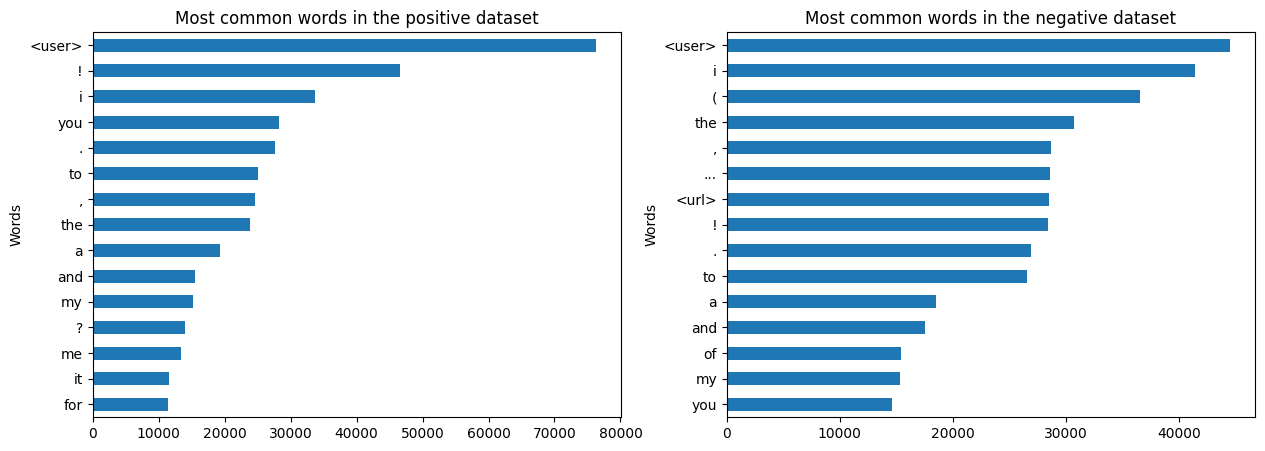

In [9]:
#Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Set the title and labels for the two plots
ax1.set_title("Most common words in the positive dataset")
ax1.set_xlabel("Number of occurences")
ax1.set_ylabel("Words")
ax2.set_title("Most common words in the negative dataset")
ax2.set_xlabel("Number of occurences")
ax2.set_ylabel("Words")

#Plot the barchart for the 2 datasets
word_list_pos.head(15).iloc[::-1].plot(kind='barh', ax=ax1)
word_list_neg.head(15).iloc[::-1].plot(kind='barh', ax=ax2)

#Show the plots
plt.show()

When analyzing the most common words in the positive and negative classes, we can see that most of the words are stop words or punctuation. This is not surprising, as the most common words are not very useful for sentiment analysis. We will focus on the content words that are more strongly associated with positive or negative sentiment.

# Distribution of the length of tweets

In [10]:
lst_len_pos = train_pos_without_duplicates.tweets.apply(lambda x: len(x))
lst_len_neg = train_neg_without_duplicates.tweets.apply(lambda x: len(x))

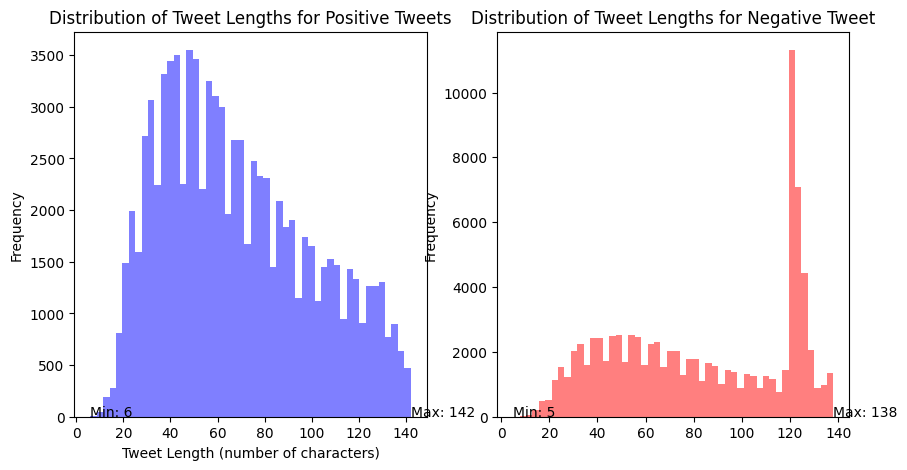

In [11]:
# Use NumPy to compute the histogram and statistics for the first list
hist1, bins1 = np.histogram(lst_len_pos, bins=50)
min_length1 = np.min(lst_len_pos)
max_length1 = np.max(lst_len_pos)
std_dev1 = np.std(lst_len_pos)

# Use NumPy to compute the histogram and statistics for the second list
hist2, bins2 = np.histogram(lst_len_neg, bins=50)
min_length2 = np.min(lst_len_neg)
max_length2 = np.max(lst_len_neg)
std_dev2 = np.std(lst_len_neg)

# Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot the histogram for the first list using Matplotlib
ax1.hist(lst_len_pos, bins=bins1, color='blue', alpha=0.5)
# add labels, title, and statistics for the first list
ax1.set_xlabel('Tweet Length (number of characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Tweet Lengths for Positive Tweets')
ax1.text(min_length1, 0, 'Min: {}'.format(min_length1))
ax1.text(max_length1, 0, 'Max: {}'.format(max_length1))

# plot the histogram for the second list using Matplotlib
ax2.hist(lst_len_neg, bins=bins2, color='red', alpha=0.5)
# add labels, title, and statistics for the second list
ax1.set_xlabel('Tweet Length (number of characters)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Tweet Lengths for Negative Tweet')
ax2.text(min_length2, 0, 'Min: {}'.format(min_length2))
ax2.text(max_length2, 0, 'Max: {}'.format(max_length2))

# show the plots
plt.show()


The length of tweets is not constant or in the same range, so it is important to consider this when analyzing the sentiment of tweets. Longer tweets may have more complex structures and sentiments, while shorter tweets may be more straightforward and less nuanced.

# Effect of our Preprocessing on these metrics

In [12]:
from preprocessing import *

In [13]:
pos_df_clean = train_pos_without_duplicates.tweets.apply(lambda x: clean_data(x, stopwords=True, lemmatization=True))
neg_df_clean = train_neg_without_duplicates.tweets.apply(lambda x: clean_data(x, stopwords=True, lemmatization=True))

Cleaning data:  10000  tweets cleaned
Cleaning data:  20000  tweets cleaned
Cleaning data:  30000  tweets cleaned
Cleaning data:  40000  tweets cleaned
Cleaning data:  50000  tweets cleaned
Cleaning data:  60000  tweets cleaned
Cleaning data:  70000  tweets cleaned
Cleaning data:  80000  tweets cleaned
Cleaning data:  90000  tweets cleaned
Cleaning data:  100000  tweets cleaned
Cleaning data:  110000  tweets cleaned
Cleaning data:  120000  tweets cleaned
Cleaning data:  130000  tweets cleaned
Cleaning data:  140000  tweets cleaned
Cleaning data:  150000  tweets cleaned
Cleaning data:  160000  tweets cleaned
Cleaning data:  170000  tweets cleaned
Cleaning data:  180000  tweets cleaned


In [14]:
pos_df_clean.head()

0    duno justin read mention justin god know hope ...
1                   logic dumb negative crop photo tsk
2              casper box looved battle bitch negative
3                  thanks sir trip lil mama doin thang
4    visiting brother tomorrow bestest birthday gif...
Name: tweets, dtype: object

In [15]:
neg_df_clean.head()

0    vinco tresorpack difficulty negative object ne...
1    glad positive dot taks tomorrow thankful posit...
2            celtic regular season fucked play playoff
3           actually kill negative girl sorry negative
4           find hard negative believe afraid negative
Name: tweets, dtype: object

# Most common words after preprocessing

In [16]:
word_list_pos_clean = pos_df_clean.apply(lambda x: x.split()).explode().value_counts()
word_list_neg_clean = neg_df_clean.apply(lambda x: x.split()).explode().value_counts()

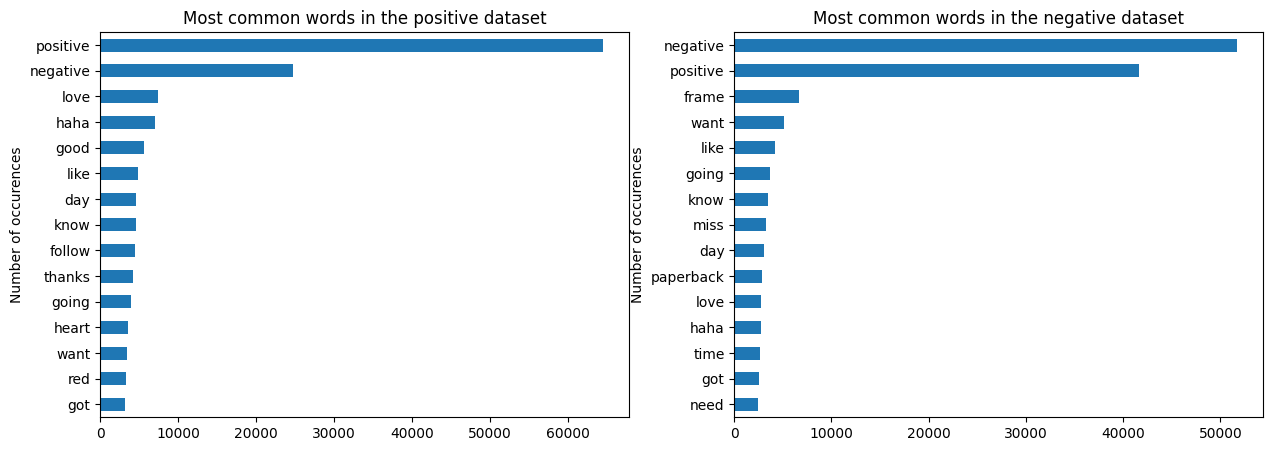

In [17]:
#Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Set the title and labels for the two plots
ax1.set_title("Most common words in the positive dataset")
ax1.set_xlabel("Words")
ax1.set_ylabel("Number of occurences")
ax2.set_title("Most common words in the negative dataset")
ax2.set_xlabel("Words")
ax2.set_ylabel("Number of occurences")

#Plot the barchart for the 2 datasets
word_list_pos_clean.head(15).iloc[::-1].plot(kind='barh', ax=ax1)
word_list_neg_clean.head(15).iloc[::-1].plot(kind='barh', ax=ax2)

#Show the plots
plt.show()

Preprocessing the tweets has also highlighted the most common words, which is useful for several reasons. First, the most common words can provide valuable insights into the overall sentiment of the tweets. For example, if the most common words are positive, such as "haha" and "love," it may indicate that the sentiment of the tweets is generally positive. On the other hand, if the most common words are negative, such as "miss" and "need," it may indicate that the sentiment of the tweets is generally negative. Second, the most common words can help identify trends and patterns in the data, which can be useful for further analysis.

# Distribution of tweets length after preprocessing

In [18]:
lst_len_pos_clean = pos_df_clean.apply(lambda x: len(x))
lst_len_neg_clean = neg_df_clean.apply(lambda x: len(x))

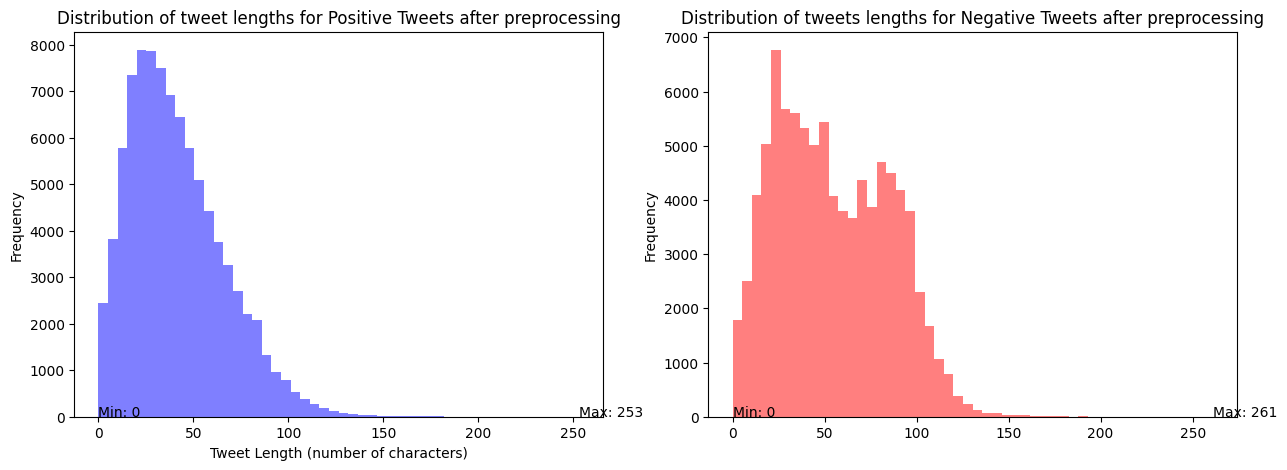

In [19]:
# Use NumPy to compute the histogram and statistics for the first list
hist1, bins1 = np.histogram(lst_len_pos_clean, bins=50)
min_length1 = np.min(lst_len_pos_clean)
max_length1 = np.max(lst_len_pos_clean)
std_dev1 = np.std(lst_len_pos_clean)

# Use NumPy to compute the histogram and statistics for the second list
hist2, bins2 = np.histogram(lst_len_neg_clean, bins=50)
min_length2 = np.min(lst_len_neg_clean)
max_length2 = np.max(lst_len_neg_clean)
std_dev2 = np.std(lst_len_neg_clean)

# Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot the histogram for the first list using Matplotlib
ax1.hist(lst_len_pos_clean, bins=bins1, color='blue', alpha=0.5)
# add labels, title, and statistics for the first list
ax1.set_xlabel('Tweet Length (number of characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of tweet lengths for Positive Tweets after preprocessing')
ax1.text(min_length1, 0, 'Min: {}'.format(min_length1))
ax1.text(max_length1, 0, 'Max: {}'.format(max_length1))

# plot the histogram for the second list using Matplotlib
ax2.hist(lst_len_neg_clean, bins=bins2, color='red', alpha=0.5)
# add labels, title, and statistics for the second list
ax1.set_xlabel('Tweet Length (number of characters)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of tweets lengths for Negative Tweets after preprocessing')
ax2.text(min_length2, 0, 'Min: {}'.format(min_length2))
ax2.text(max_length2, 0, 'Max: {}'.format(max_length2))

# show the plots
plt.show()

By shortening the length of the tweets, we can make them easier to work with and process more efficiently. This can lead to faster and more accurate results. Additionally, reducing the length of the tweets can help eliminate unnecessary information and noise, which can improve the overall quality and reliability of the analysis. Finally, shorter tweets can make it easier for readers to understand and interpret the results of the analysis. Overall, preprocessing the tweets to shorten their length is a valuable step that can help ensure the success of the sentiment analysis.

## Summary

/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1694495107.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_x_axes().join(ax1, ax3)
/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1694495107.py:19: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.get_shared_x_axes().join(ax2, ax4)


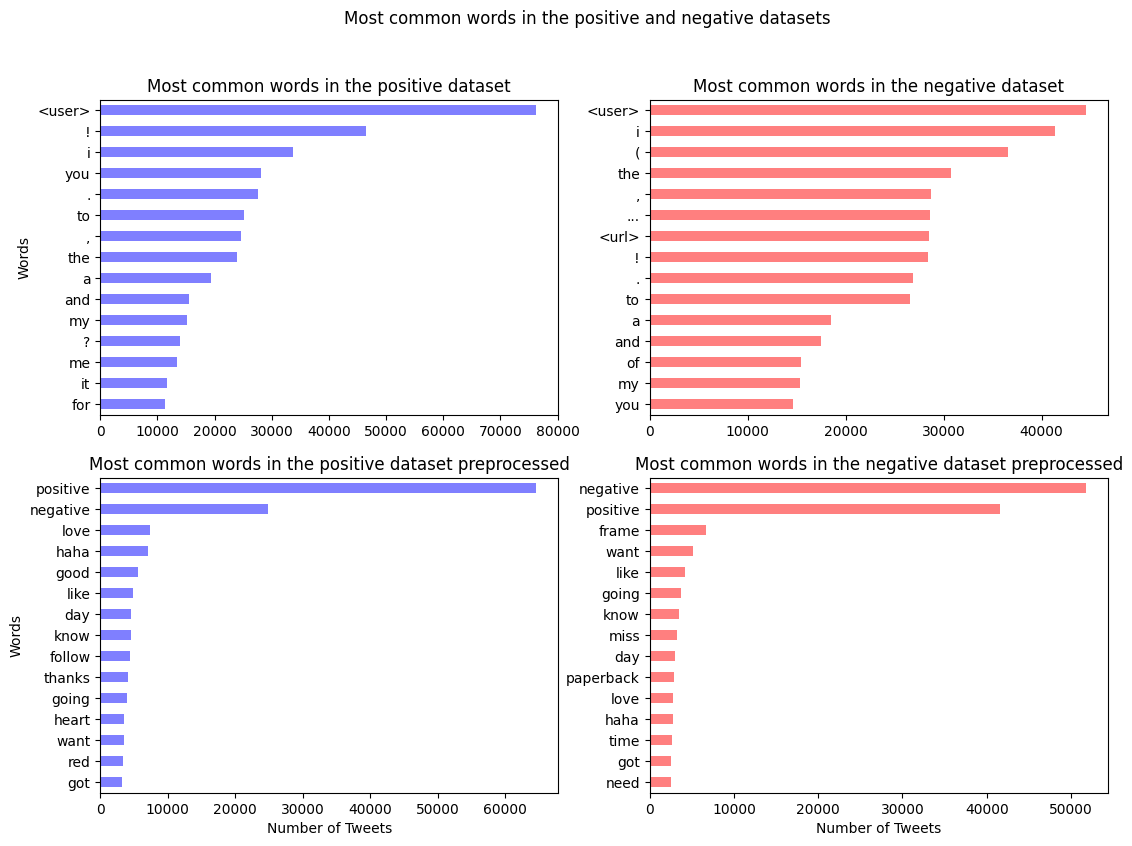

In [20]:
#Create the figure and axes for the two plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 9))
fig.suptitle('Most common words in the positive and negative datasets')

# Set the title and labels for the two plots
ax1.set_title("Most common words in the positive dataset")
ax2.set_title("Most common words in the negative dataset")
ax3.set_title("Most common words in the positive dataset preprocessed")
ax4.set_title("Most common words in the negative dataset preprocessed")

#Plot the barchart for the 2 datasets
word_list_pos.head(15).iloc[::-1].plot(kind='barh', ax=ax1, color='blue', alpha=0.5)
word_list_neg.head(15).iloc[::-1].plot(kind='barh', ax=ax2, color='red', alpha=0.5)
word_list_pos_clean.head(15).iloc[::-1].plot(kind='barh', ax=ax3, color='blue', alpha=0.5)
word_list_neg_clean.head(15).iloc[::-1].plot(kind='barh', ax=ax4, color='red', alpha=0.5)

# Share the x axis for the last two plots
ax1.get_shared_x_axes().join(ax1, ax3)
ax2.get_shared_x_axes().join(ax2, ax4)

ax1.set(ylabel='Words')
ax3.set(xlabel='Number of Tweets', ylabel='Words')
ax4.set(xlabel='Number of Tweets')

#Show the plots
plt.show()

/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1545717049.py:40: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1545717049.py:41: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[1, 0].get_shared_y_axes().join(axs[1, 0], axs[1, 1])
/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1545717049.py:44: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_x_axes().join(axs[0, 0], axs[1, 0])
/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_19055/1545717049.py:45: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor

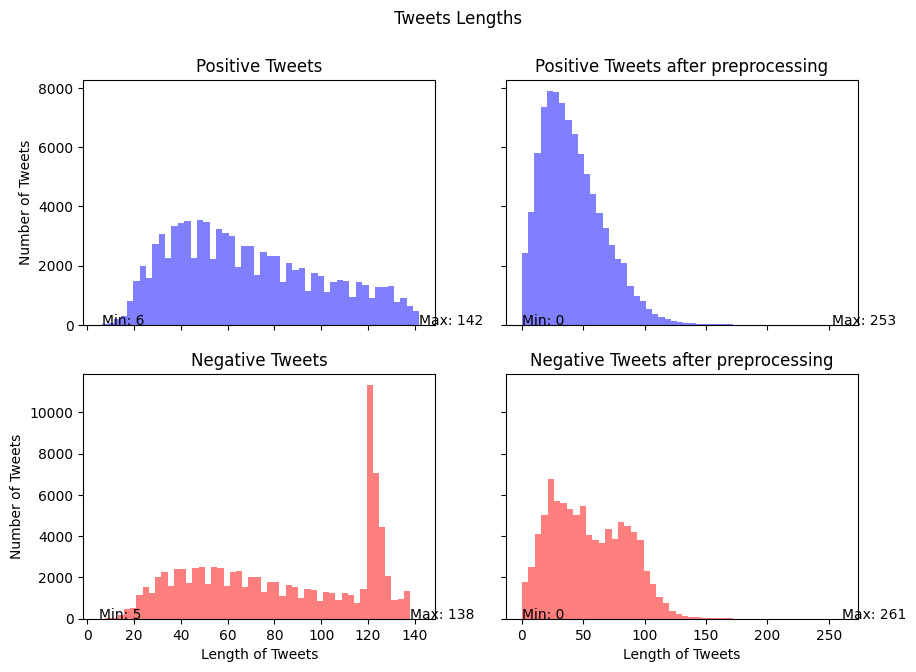

In [21]:
# Use NumPy to compute the histogram and statistics for each of the plots
min_length00 = np.min(lst_len_pos)
max_length00 = np.max(lst_len_pos)

min_length01 = np.min(lst_len_neg)
max_length01 = np.max(lst_len_neg)

min_length10 = np.min(lst_len_pos_clean)
max_length10 = np.max(lst_len_pos_clean)

min_length11 = np.min(lst_len_neg_clean)
max_length11 = np.max(lst_len_neg_clean)

# Create the figure and axes for the four plots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Tweets Lengths')

# Plot the histograms for the four lists using Matplotlib
axs[0, 0].hist(lst_len_pos, bins=50, color='blue', alpha=0.5)
axs[0, 0].set_title('Positive Tweets')
axs[0, 0].text(min_length00, 0, 'Min: {}'.format(min_length00))
axs[0, 0].text(max_length00, 0, 'Max: {}'.format(max_length00))

axs[0, 1].hist(lst_len_pos_clean, bins=50, color='blue', alpha=0.5)
axs[0, 1].set_title('Positive Tweets after preprocessing')
axs[0, 1].text(min_length10, 0, 'Min: {}'.format(min_length10))
axs[0, 1].text(max_length10, 0, 'Max: {}'.format(max_length10))

axs[1, 0].hist(lst_len_neg, bins=50, color='red', alpha=0.5)
axs[1, 0].set_title('Negative Tweets')
axs[1, 0].text(min_length01, 0, 'Min: {}'.format(min_length01))
axs[1, 0].text(max_length01, 0, 'Max: {}'.format(max_length01))

axs[1, 1].hist(lst_len_neg_clean, bins=50, color='red', alpha=0.5)
axs[1, 1].set_title('Negative Tweets after preprocessing')
axs[1, 1].text(min_length11, 0, 'Min: {}'.format(min_length11))
axs[1, 1].text(max_length11, 0, 'Max: {}'.format(max_length11))

# Share the y axis for the first two plots
axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
axs[1, 0].get_shared_y_axes().join(axs[1, 0], axs[1, 1])

# Share the x axis for the last two plots
axs[0, 0].get_shared_x_axes().join(axs[0, 0], axs[1, 0])
axs[0, 1].get_shared_x_axes().join(axs[0, 1], axs[1, 1])

for ax in axs.flat:
    ax.set(xlabel='Length of Tweets', ylabel='Number of Tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Show the plots
plt.show()

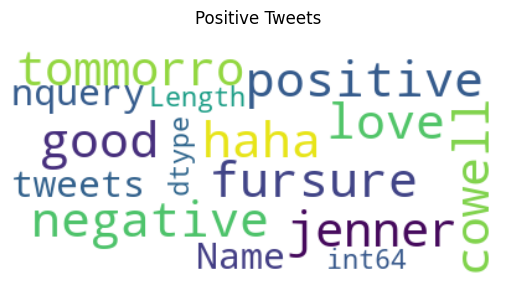

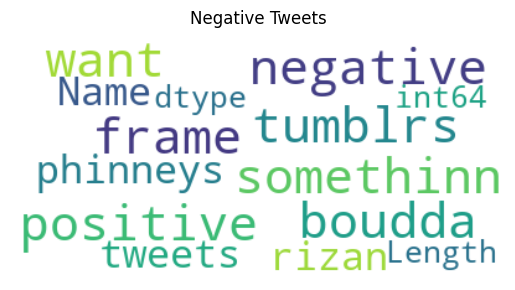

In [28]:
from wordcloud import WordCloud
 
# Wordcloud with positive tweets
positive_tweets = word_list_pos_clean
positive_wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = word_list_neg_clean
negative_wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()